In [1]:
import pandas as pd



# Baby

In [2]:
data_df= pd.read_csv('baby_develop.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imageSkeleton Hands Neckla...",EditSell SimilarExclude listing,$15.29Fixed price,$0.00100% Free shipping,1,$15.29,–,"Mar 18, 2024"
1,1,", preview full size imageHello Kitty Cat Gold ...",EditSell SimilarExclude listing,$10.00Fixed price,$0.500% Free shipping,1,$10.00,–,"Mar 18, 2024"
2,2,", preview full size imageSkelton skull Necklac...",EditSell SimilarExclude listing,$7.00Fixed price,$0.00100% Free shipping,2,$14.00,–,"Mar 18, 2024"
3,3,", preview full size imageNew Fashion Stainless...",EditSell SimilarExclude listing,$5.49Fixed price,$0.00100% Free shipping,1,$5.49,–,"Mar 15, 2024"
4,4,", preview full size imageHard Jewlery Mini Cub...",EditSell SimilarExclude listing,$19.00Fixed price,$4.360% Free shipping,1,$19.00,–,"Mar 14, 2024"
...,...,...,...,...,...,...,...,...,...
11745,45,", preview full size imageBaby Toys Musical Cat...",EditSell SimilarExclude listing,$17.99Fixed price,$0.00100% Free shipping,1,$17.99,–,"Jun 20, 2023"
11746,46,", preview full size image7"" Vtech Move and Cra...",EditExclude listing,$7.77Fixed price,$13.400% Free shipping,1,$7.77,–,"Jun 19, 2023"
11747,47,", preview full size image7"" Vtech Move and Cra...",EditExclude listing,$18.00Fixed price,$0.00100% Free shipping,1,$18.00,–,"Jun 19, 2023"
11748,48,", preview full size imageEducational Toys Baby...",EditSell SimilarExclude listing,$11.10Fixed price,$7.9875% Free shipping,5,$55.52,–,"Jun 19, 2023"


In [3]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value


In [4]:
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.head()

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,0,preview full size imageSkeleton Hands Necklac...,EditSell SimilarExclude listing,$15.29Fixed price,$0.00100% Free shipping,1,$15.29,–,Mar 18 2024,15.29,15.29,1.0,2024-03-18,0.00
1,1,preview full size imageHello Kitty Cat Gold P...,EditSell SimilarExclude listing,$10.00Fixed price,$0.500% Free shipping,1,$10.00,–,Mar 18 2024,10.00,10.00,1.0,2024-03-18,0.50
2,2,preview full size imageSkelton skull Necklace...,EditSell SimilarExclude listing,$7.00Fixed price,$0.00100% Free shipping,2,$14.00,–,Mar 18 2024,7.00,14.00,2.0,2024-03-18,0.00
3,3,preview full size imageNew Fashion Stainless ...,EditSell SimilarExclude listing,$5.49Fixed price,$0.00100% Free shipping,1,$5.49,–,Mar 15 2024,5.49,5.49,1.0,2024-03-15,0.00
4,4,preview full size imageHard Jewlery Mini Cuba...,EditSell SimilarExclude listing,$19.00Fixed price,$4.360% Free shipping,1,$19.00,–,Mar 14 2024,19.00,19.00,1.0,2024-03-14,0.36


In [5]:
data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)
data_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,preview full size imageSkeleton Hands Necklac...,15.29,15.29,1.0,2024-03-18,0.00
1,preview full size imageHello Kitty Cat Gold P...,10.00,10.00,1.0,2024-03-18,0.50
2,preview full size imageSkelton skull Necklace...,7.00,14.00,2.0,2024-03-18,0.00
3,preview full size imageNew Fashion Stainless ...,5.49,5.49,1.0,2024-03-15,0.00
4,preview full size imageHard Jewlery Mini Cuba...,19.00,19.00,1.0,2024-03-14,0.36


In [7]:
data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

In [17]:
# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)
data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl..."
1,Hello Kitty Cat Gold Pendant Necklace in Cubic...,10.00,10.00,1.0,2024-03-18,0.50,"[Hello, Kitty, Cat, Gold, Pendant, Necklace, C..."
2,Skelton skull Necklace metal alloy Emo Hallowe...,7.00,14.00,2.0,2024-03-18,0.00,"[Skelton, skull, Necklace, metal, alloy, Emo, ..."
3,New Fashion Stainless Steel Magic Witch Neckla...,5.49,5.49,1.0,2024-03-15,0.00,"[New, Fashion, Stainless, Steel, Magic, Witch,..."
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler..."
...,...,...,...,...,...,...,...
11745,Baby Toys Musical CaterpillarMulticolor Infant...,17.99,17.99,1.0,2023-06-20,0.00,"[Baby, Toys, Musical, CaterpillarMulticolor, I..."
11746,"7"" Vtech Move and Crawl Electronic Ball Baby D...",7.77,7.77,1.0,2023-06-19,3.40,"[Vtech, Move, Crawl, Electronic, Ball, Baby, D..."
11747,"7"" Vtech Move and Crawl Electronic Ball Baby D...",18.00,18.00,1.0,2023-06-19,0.00,"[Vtech, Move, Crawl, Electronic, Ball, Baby, D..."
11748,Educational Toys Baby Tablet For 1-6 year old ...,11.10,55.52,5.0,2023-06-19,0.99,"[Educational, Toys, Baby, Tablet, 1-6, year, o..."


# Popular Whole DF

In [148]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 10]
filtered_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl..."
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler..."
6,Premier Designs Jewlery Spring Break Colorful ...,29.00,29.00,1.0,2024-03-11,0.80,"[Premier, Designs, Jewlery, Spring, Break, Col..."
9,INVICTA RESERVE 925 MEN'S JEWLERY BEAD/SKULL A...,26.00,52.00,2.0,2024-03-06,0.00,"[INVICTA, RESERVE, MEN, JEWLERY, BEAD/SKULL, A..."
10,Dance Necklace Dancer Gift Ballerina Jewlery S...,26.95,53.90,2.0,2024-03-05,0.95,"[Dance, Necklace, Dancer, Gift, Ballerina, Jew..."


In [149]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [150]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

In [152]:
# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Baby Toys')]
testing_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
1756,Soft Car Toys for 1 Year Old Boy Girl - Baby T...,15.99,15.99,1.0,2024-03-18,0.00,"[Soft, Car, Toys, Year, Old, Boy, Girl, Baby, ..."
1764,Black and White High Contrast Baby Toys 0-3 Mo...,27.88,27.88,1.0,2024-03-18,0.00,"[Black, White, High, Contrast, Baby, Toys, 0-3..."
1773,Lot of 5 Baby Toys Fisher Price Vtech Leap Fro...,21.00,21.00,1.0,2024-03-18,0.81,"[Lot, Baby, Toys, Fisher, Price, Vtech, Leap, ..."
1824,Toys for 1 2 3 Year Old Boy Baby Toys 6 to 12 ...,15.59,311.85,20.0,2024-03-17,0.00,"[Toys, Year, Old, Boy, Baby, Toys, Months, Ele..."
1877,Baby Toys 12-18 Months Hammer Pounding Xylopho...,28.37,113.47,4.0,2024-03-16,0.00,"[Baby, Toys, 12-18, Months, Hammer, Pounding, ..."
...,...,...,...,...,...,...,...
11699,1 Year Old Girl Gifts Piano Mat Baby Toys for ...,24.75,24.75,1.0,2023-06-21,0.00,"[Year, Old, Girl, Gifts, Piano, Mat, Baby, Toy..."
11708,Fat Brain Toys InnyBin Baby Toys - Multicolour...,19.99,39.98,2.0,2023-06-21,0.00,"[Fat, Brain, Toys, InnyBin, Baby, Toys, Piece,..."
11710,Baby Toys for 1 Year Old Boys & Girls 2 in 1 M...,32.99,32.99,1.0,2023-06-21,0.00,"[Baby, Toys, Year, Old, Boys, Girls, Musical, ..."
11727,Montessori Baby Toys Rolling Ball Pile Tower E...,15.54,15.54,1.0,2023-06-20,0.00,"[Montessori, Baby, Toys, Rolling, Ball, Pile, ..."


In [153]:
# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

In [154]:
most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Baby Toys,1413
1,Toys for,561
2,Year Old,422
3,Toys 6,395
4,for 1,386
5,6 to,361
6,12 Months,344
7,Toys 6 to,338
8,to 12,331
9,Toys for 1,330


In [162]:
most_common_phrases_df = most_common_phrases_df[most_common_phrases_df['Name'].apply(lambda x: len(x.split()) > 3)]
most_common_phrases_df.head(15)

,Name,Count
14,Toys 6 to 12,303
16,6 to 12 Months,300
17,Toys 6 to 12 Months,280
18,Baby Toys 6 to,268
20,Baby Toys 6 to 12,242
21,for 1 Year Old,240
22,Toys for 1 Year,232
23,Toys for 1 Year Old,214
41,Montessori Toys for 1,95
42,Baby Toys 12-18 Months,94


In [163]:
type_product = most_common_phrases_df['Name'].head(15).tolist()
type_product

['Toys 6 to 12',
 '6 to 12 Months',
 'Toys 6 to 12 Months',
 'Baby Toys 6 to',
 'Baby Toys 6 to 12',
 'for 1 Year Old',
 'Toys for 1 Year',
 'Toys for 1 Year Old',
 'Montessori Toys for 1',
 'Baby Toys 12-18 Months',
 '1 Year Old Boy',
 'Toys for 1 2',
 'for 1 Year Old Boy',
 'Interactive Walking Dancing Toy',
 'Montessori Toys for 1 Year']

In [166]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [167]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Toys 6 to 12,22.755842,13.9900,29.4250,190.0,0.0
1,6 to 12 Months,21.518037,13.5900,26.7150,219.0,0.0
2,Toys 6 to 12 Months,21.823684,13.4500,28.0650,171.0,0.0
3,Baby Toys 6 to,23.051067,14.0525,29.8275,178.0,0.0
4,Baby Toys 6 to 12,23.104375,13.9900,29.9075,176.0,0.0
5,for 1 Year Old,26.276527,15.5750,33.6350,239.0,0.0
6,Toys for 1 Year,25.474537,15.2650,32.8050,227.0,0.0
7,Toys for 1 Year Old,25.781357,15.2900,32.9300,221.0,0.0
8,Montessori Toys for 1,18.811102,12.3000,20.7275,118.0,0.0
9,Baby Toys 12-18 Months,26.174531,16.3100,34.1675,64.0,0.0


# Popular Individual Listtings Sold

In [21]:
popular_listings = data_df.groupby(by='Listing').mean().sort_values(by='Total_Sold', ascending=False)
popular_listings.head()

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_1179/1285034027.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular_listings = data_df.groupby(by='Listing').mean().sort_values(by='Total_Sold', ascending=False)


,Avg_Sold_Price,Total_Sales,Total_Sold,Shipping
Listing,,,,
Puritan's Pride Lycopene 40 mg - 60 SoftgelsPuritan's Pride Lycopene 40 mg - 60 Softgels,10.36,80575.64,7780.0,0.95
NutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit SupplementsNutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit Supplements,16.80,120362.07,7163.0,0.44
Puritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release SoftgelsPuritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release Softgels,11.58,81930.99,7077.0,0.96
Vitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune HealthVitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune Health,9.98,59226.53,5933.0,0.00
Organic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra StrengthOrganic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra Strength,12.51,66849.42,5344.0,3.73


<AxesSubplot:>

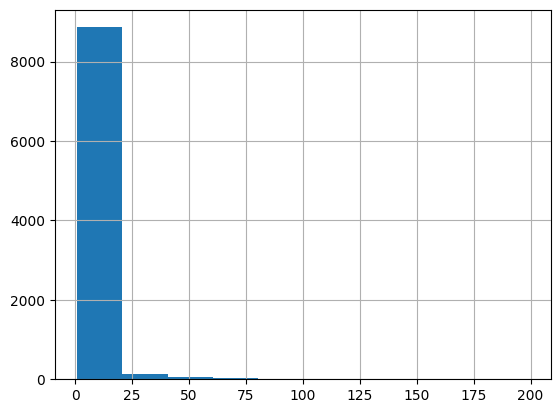

In [32]:
popular_listings['Total_Sold'].loc[popular_listings['Total_Sold'] < 200].hist()

<AxesSubplot:>

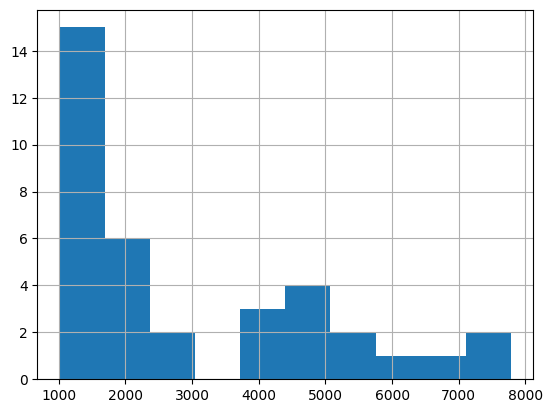

In [37]:
popular_listings['Total_Sold'].loc[popular_listings['Total_Sold'] > 1000].hist()

In [60]:
top = popular_listings.loc[popular_listings['Total_Sold'] > 1000]
top.head()

,Avg_Sold_Price,Total_Sales,Total_Sold,Shipping
Listing,,,,
Puritan's Pride Lycopene 40 mg - 60 SoftgelsPuritan's Pride Lycopene 40 mg - 60 Softgels,10.36,80575.64,7780.0,0.95
NutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit SupplementsNutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit Supplements,16.80,120362.07,7163.0,0.44
Puritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release SoftgelsPuritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release Softgels,11.58,81930.99,7077.0,0.96
Vitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune HealthVitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune Health,9.98,59226.53,5933.0,0.00
Organic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra StrengthOrganic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra Strength,12.51,66849.42,5344.0,3.73


In [61]:
top['Title_Keywords'] = top.index.tolist()
# Apply the function to both listing titles and descriptions
top['Title_Keywords'] = top['Title_Keywords'].apply(extract_keywords)
top.head()

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_1179/3087819854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['Title_Keywords'] = top.index.tolist()
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_1179/3087819854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['Title_Keywords'] = top['Title_Keywords'].apply(extract_keywords)


,Avg_Sold_Price,Total_Sales,Total_Sold,Shipping,Title_Keywords
Listing,,,,,
Puritan's Pride Lycopene 40 mg - 60 SoftgelsPuritan's Pride Lycopene 40 mg - 60 Softgels,10.36,80575.64,7780.0,0.95,"[Puritan, Pride, Lycopene, SoftgelsPuritan, Pr..."
NutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit SupplementsNutriFlair Liposomal Vitamin C 1600mg 180 Capsules Fat Soluble Vit Supplements,16.80,120362.07,7163.0,0.44,"[NutriFlair, Liposomal, Vitamin, C, Fat, Solub..."
Puritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release SoftgelsPuritan's Pride Q-SORB Co Q-10 100 mg - 120 Rapid Release Softgels,11.58,81930.99,7077.0,0.96,"[Puritan, Pride, Q-SORB, Co, Q-10, Rapid, Rele..."
Vitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune HealthVitamin K2 (MK7) with D3 5000 IU Supplement BioPerine Capsules Immune Health,9.98,59226.53,5933.0,0.00,"[Vitamin, K2, MK7, D3, IU, Supplement, BioPeri..."
Organic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra StrengthOrganic vitamin Milk Thistle Silimarina 120 Capsules Made in USA extra Strength,12.51,66849.42,5344.0,3.73,"[Organic, vitamin, Milk, Thistle, Silimarina, ..."


In [68]:
from collections import Counter
# Flatten the filtered lists
top_lists = top['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(top_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [67]:
common_words_df = pd.DataFrame(most_common_words, columns=['Name', 'Count'])
common_words_df.head(15)

,Name,Count
0,Health,14
1,Vitamin,13
2,Supplement,12
3,Support,11
4,Strength,9
5,Capsules,8
6,mg,8
7,Prostate,8
8,Pride,6
9,C,6


# Analysis Vitmains

In [170]:
# Filter rows where 'vitamin' or 'Vitamin' is in the list
filtered_df = data_df[data_df['Title_Keywords'].apply(lambda x: 'vitamin' in x or 'Vitamin' in x)]

filtered_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
1353,Algae DHA with Vitamin A & Lutein Natural Berr...,18.38,36.76,2.0,2024-03-18,0.00,"[Algae, DHA, Vitamin, A, Lutein, Natural, Berr..."
1382,Puritan's Pride Vitamin E-with Selenium 400 IU...,8.46,414.77,49.0,2024-03-18,0.95,"[Puritan, Pride, Vitamin, E-with, Selenium, IU..."
1400,240 Vitamin D3+K2(MK-7)Capsules 250mcg For Imm...,18.55,1539.81,83.0,2024-03-18,0.00,"[Vitamin, D3+K2, MK-7, Immune, Bone, Health, B..."
1410,Elderberry Immune Support Gummies Zinc Vitamin...,10.10,22116.87,2190.0,2024-03-18,0.00,"[Elderberry, Immune, Support, Gummies, Zinc, V..."
1411,DHC millet up 90day 270 tablet supplement Japa...,22.18,22.18,1.0,2024-03-18,0.00,"[DHC, tablet, supplement, Japan, Hair, Health,..."


In [171]:
from collections import Counter
# Flatten the filtered lists
top_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(top_lists)

# Find the most common words
most_common_words = word_counts.most_common()

common_words_df = pd.DataFrame(most_common_words, columns=['Name', 'Count'])
common_words_df.head(10)

,Name,Count
0,Vitamin,88
1,D3,24
2,C,18
3,Capsules,17
4,Supplement,15
5,IU,14
6,Health,14
7,mg,14
8,Softgels,13
9,Zinc,12


In [172]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Vitamin C,16
1,Vitamin D3,14
2,5000 IU,10
3,D3 5000,8
4,D3 5000 IU,8
5,Vitamin E,8
6,with Vitamin,6
7,K2 (MK7),6
8,AREDS 2,6
9,Vitamin A,5


In [173]:
type_product = most_common_phrases_df['Name'].head(6).tolist()

dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}

for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Vitamin C,23.271818,15.6650,30.3650,11.0,0.0
1,Vitamin D3,20.677500,16.7475,19.2225,8.0,0.0
2,5000 IU,13.725000,11.3650,14.6325,6.0,0.0
3,D3 5000,13.545000,10.9325,14.0925,4.0,0.0
4,D3 5000 IU,13.545000,10.9325,14.0925,4.0,0.0
5,Vitamin E,15.580000,11.9600,17.9200,5.0,1.0


# Automation By Price

In [169]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 20]


def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])

# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Baby Toys')]

# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()


most_common_phrases_df = most_common_phrases_df[most_common_phrases_df['Name'].apply(lambda x: len(x.split()) > 3)]

type_product = most_common_phrases_df['Name'].head(15).tolist()

dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}

for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,for 1 Year Old,26.276527,15.5750,33.6350,239.0,0.0
1,Toys for 1 Year,25.474537,15.2650,32.8050,227.0,0.0
2,Toys for 1 Year Old,25.781357,15.2900,32.9300,221.0,0.0
3,6 to 12 Months,21.518037,13.5900,26.7150,219.0,0.0
4,Toys 6 to 12,22.755842,13.9900,29.4250,190.0,0.0
5,Learn Coffee Mug Baby,29.417234,25.0000,34.9900,94.0,0.0
6,Toys 6 to 12 Months,21.823684,13.4500,28.0650,171.0,0.0
7,Wake Up & Learn,27.885000,24.5000,33.2825,96.0,0.0
8,Baby Toys 6 to,23.051067,14.0525,29.8275,178.0,0.0
9,Baby Toys 6 to 12,23.104375,13.9900,29.9075,176.0,0.0
